# WeatherPy
Create a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator by utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.

In [1]:
# import dependencies

import matplotlib.pyplot as plt
import seaborn as sns
import requests
from pprint import pprint
import time
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
import statsmodels.api as sm
from api_keys import weather_api_key

# import citipy to generate city lat/lng
from citipy import citipy

# create output for csv
output_data_file = "burns_cities.csv"

# set lat/lng ranges
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create List of Cities
Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.

In [2]:
 # create lists for cities & Lat/lng
lat_lngs = []
cities = []

# need set of random lat/lng
latitudes = np.random.uniform(lat_range[0], lat_range[1], size=1500)
longitudes = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(latitudes, longitudes)

# pull cities according to above
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # make sure cities aren't added twice
    if city not in cities:
        cities.append(city)

#confirm city count
len(cities)

609

# API Calls for City Weather Data
Perform a weather check on each of the cities using a series of successive API calls.
Include a print log of each city as it's being processed with the city number and city name.

In [3]:
# Starting URL for Weather Map API call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Create a list for the City Data
city_data = []

# Print log
print("Beginning Data Retrieval")
print ("-" * 15)


# Create record count 
record_count = 1
set_count = 1

# Loop through cities
for index, city in enumerate(cities):
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    city_url = url + "&q=" + city

    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    #API requests for each city
    try:
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        #append data to the city data
        city_data.append({
            "City" :city,
            "Latitude" :city_lat,
            "Longitude" :city_lng,
            "Temperature" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Wind Speed" :city_wind,
            "Country" :city_country,
            "Date" :city_date  
        })
    except:
        print("City not found. Skipping ...")
        pass

        print("-----------------------")
        print("Data Retrieval Complete")
        print("-----------------------")

Beginning Data Retrieval
---------------
Processing Record 1 of Set 1 | qandala
Processing Record 2 of Set 1 | ascension
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | brae
Processing Record 5 of Set 1 | ambatondrazaka
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | rascani
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | klaksvik
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | nelidovo
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | knysna
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | airai
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | alegrete
Processing Record 21 of Set 1 | tongzi
Processin

Processing Record 18 of Set 4 | port hardy
Processing Record 19 of Set 4 | rocha
Processing Record 20 of Set 4 | paka
Processing Record 21 of Set 4 | camana
Processing Record 22 of Set 4 | prainha
Processing Record 23 of Set 4 | adrar
Processing Record 24 of Set 4 | sao jose da coroa grande
Processing Record 25 of Set 4 | oktyabrskoye
Processing Record 26 of Set 4 | sarangani
Processing Record 27 of Set 4 | khoy
Processing Record 28 of Set 4 | lake saint louis
Processing Record 29 of Set 4 | acapulco
Processing Record 30 of Set 4 | lagunillas
Processing Record 31 of Set 4 | qingdao
Processing Record 32 of Set 4 | dyatkovo
Processing Record 33 of Set 4 | khandagayty
Processing Record 34 of Set 4 | barawe
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 35 of Set 4 | sakakah
Processing Record 36 of Set 4 | ayagoz
Processing Record 37 of Set 4 | bengkulu
Processing Record 38 of Set 4 | foldes
Processing Record 39 of Set

Processing Record 34 of Set 7 | cabo san lucas
Processing Record 35 of Set 7 | yulara
Processing Record 36 of Set 7 | terra santa
Processing Record 37 of Set 7 | flores
Processing Record 38 of Set 7 | mogadishu
Processing Record 39 of Set 7 | huangyan
Processing Record 40 of Set 7 | palu
Processing Record 41 of Set 7 | bosaso
Processing Record 42 of Set 7 | gat
Processing Record 43 of Set 7 | beringovskiy
Processing Record 44 of Set 7 | padang
Processing Record 45 of Set 7 | tiksi
Processing Record 46 of Set 7 | luanda
Processing Record 47 of Set 7 | mount isa
Processing Record 48 of Set 7 | canillo
Processing Record 49 of Set 7 | sorvag
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 0 of Set 8 | samusu
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 1 of Set 8 | smithers
Processing Record 2 of Set 8 | brookings
Processing Record 3 of Set 8 | ha

Processing Record 0 of Set 11 | viking
Processing Record 1 of Set 11 | geraldton
Processing Record 2 of Set 11 | te anau
Processing Record 3 of Set 11 | havre
Processing Record 4 of Set 11 | guadalajara
Processing Record 5 of Set 11 | statesboro
Processing Record 6 of Set 11 | buchanan
Processing Record 7 of Set 11 | ixtapa
Processing Record 8 of Set 11 | lakhdenpokhya
Processing Record 9 of Set 11 | tigzirt
Processing Record 10 of Set 11 | hobyo
Processing Record 11 of Set 11 | mangai
Processing Record 12 of Set 11 | richards bay
Processing Record 13 of Set 11 | kuching
Processing Record 14 of Set 11 | thinadhoo
Processing Record 15 of Set 11 | rio rancho
Processing Record 16 of Set 11 | vale da amoreira
Processing Record 17 of Set 11 | orlik
Processing Record 18 of Set 11 | flinders
Processing Record 19 of Set 11 | kungurtug
Processing Record 20 of Set 11 | pochutla
Processing Record 21 of Set 11 | kawana waters
City not found. Skipping ...
-----------------------
Data Retrieval Comp

In [4]:
# Convert JSON to Pandas
city_data_df = pd.DataFrame(city_data)


# extract needed fields
lats = city_data_df["Latitude"]
max_temps = city_data_df["Temperature"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

city_data_df.to_csv(output_data_file, index_label="City_ID")

city_data_df.count()

City           560
Latitude       560
Longitude      560
Temperature    560
Humidity       560
Cloudiness     560
Wind Speed     560
Country        560
Date           560
dtype: int64

# Create Cities.csv
Save a CSV of all retrieved data

In [5]:
filepath = "burns_cities.csv"
df = pd.read_csv(filepath)


df.head()

,City_ID,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,qandala,11.47,49.87,78.42,68,15,5.23,SO,1604787043
1,1,ascension,30.22,-90.90,73.40,78,40,10.25,US,1604787043
2,2,chokurdakh,70.63,147.92,1.27,94,100,5.97,RU,1604787043
3,3,brae,60.40,-1.35,44.60,100,32,2.24,GB,1604787043
4,4,ambatondrazaka,-17.83,48.42,59.09,92,66,2.44,MG,1604787043


In [6]:
df.shape 

(560, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City_ID      560 non-null    int64  
 1   City         560 non-null    object 
 2   Latitude     560 non-null    float64
 3   Longitude    560 non-null    float64
 4   Temperature  560 non-null    float64
 5   Humidity     560 non-null    int64  
 6   Cloudiness   560 non-null    int64  
 7   Wind Speed   560 non-null    float64
 8   Country      558 non-null    object 
 9   Date         560 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 43.9+ KB


In [8]:
df.describe() 

,City_ID,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,279.500000,20.001375,20.669589,58.632143,72.060714,46.041071,7.912839,1.604787e+09
std,161.802349,33.099665,91.267274,22.248139,20.439707,38.451839,5.929311,6.292520e+01
min,0.000000,-54.800000,-175.200000,-12.750000,10.000000,0.000000,0.290000,1.604787e+09
25%,139.750000,-6.760000,-58.470000,45.022500,61.000000,2.000000,3.595000,1.604787e+09
50%,279.500000,25.210000,29.185000,64.715000,77.000000,40.000000,6.930000,1.604787e+09
75%,419.250000,46.515000,100.342500,75.372500,87.000000,89.000000,10.290000,1.604787e+09
max,559.000000,78.220000,179.320000,93.200000,100.000000,100.000000,56.370000,1.604787e+09


# Scatter Plots
Create a series of scatter plots to showcase the following relationships:
Temperature (F) vs. Latitude, 
Humidity (%) vs. Latitude, 
Cloudiness (%) vs. Latitude, 
Wind Speed (mph) vs. Latitude

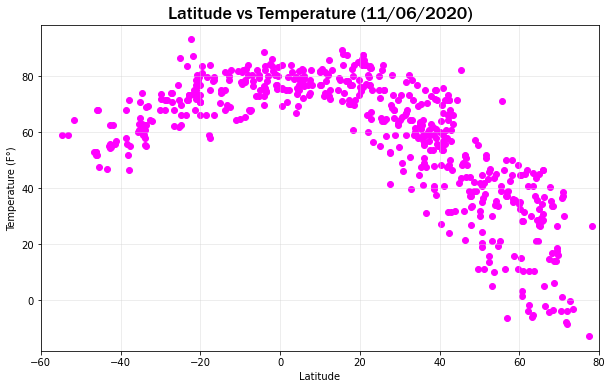

In [9]:
#This plot is showcasing a linear relationshipt between latitude and Temprature. 
#The slope indicates that temprature goes up as we near the equator and back down as we move away from it.


plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Temperature, color = "magenta")
plt.title("Latitude vs Temperature (11/06/2020)", fontsize=18, fontweight="bold", fontname = "Franklin Gothic Medium")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F°)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

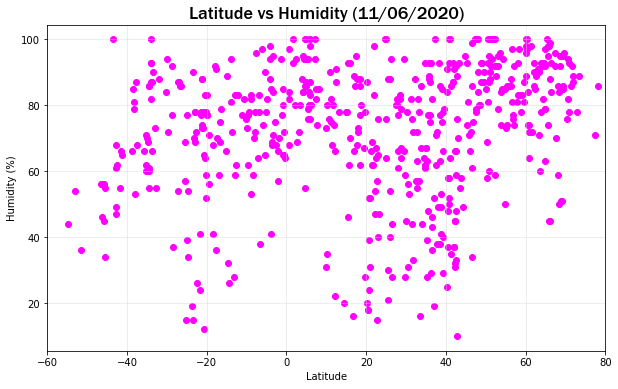

In [10]:
#This plot is demonstarting that there is little to no relationship between latitude and humidity.
#humidity appears to be spread out widely

plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Humidity, color = "magenta")
plt.title("Latitude vs Humidity (11/06/2020)", fontsize=18, fontweight="bold", fontname = "Franklin Gothic Medium")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

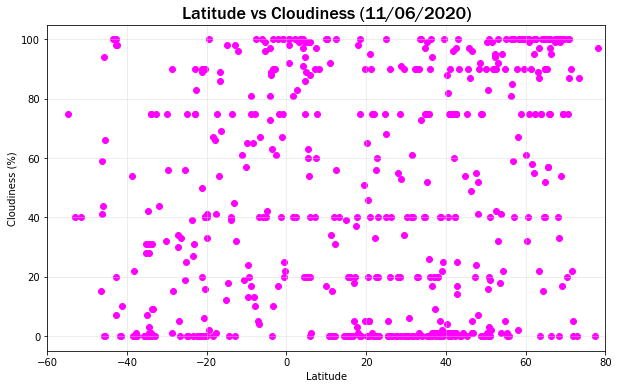

In [11]:
#This plot is demonstarting that there is a slight linear relationship to cloudiness and latitude.
#Cloudiness appears to be spread out widely but decreases in volume at peak latitudes

plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Cloudiness, color = "magenta")
plt.title("Latitude vs Cloudiness (11/06/2020)", fontsize=18, fontweight="bold", fontname = "Franklin Gothic Medium")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

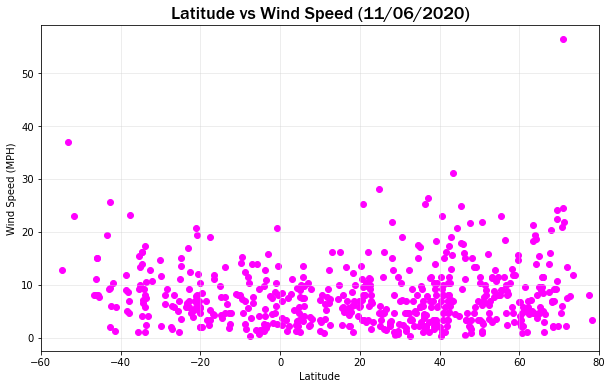

In [12]:
#This plot is demonstarting that there is a slight linear relationship to wind speed and latitude.
#Cloudiness appears to be spread out widely but decreases in volume at peak latitudes
    
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df["Wind Speed"], color = "magenta")
plt.title("Latitude vs Wind Speed (11/06/2020)", fontsize=18, fontweight="bold", fontname = "Franklin Gothic Medium")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

# Linear Regression
Run linear regression on each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

Northern Hemisphere - Temperature (F) vs. Latitude, 
Southern Hemisphere - Temperature (F) vs. Latitude, 
Northern Hemisphere - Humidity (%) vs. Latitude, 
Southern Hemisphere - Humidity (%) vs. Latitude, 
Northern Hemisphere - Cloudiness (%) vs. Latitude, 
Southern Hemisphere - Cloudiness (%) vs. Latitude, 
Northern Hemisphere - Wind Speed (mph) vs. Latitude, 
Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [13]:
#create hemisphere data frame

df["Hemisphere_NS"] = ["Northern" if x > 0 else "Southern" for x in df.Latitude]
df["Hemisphere_WE"] = ["Eastern" if x > 0 else "Western" for x in df.Longitude]

df.head()

,City_ID,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date,Hemisphere_NS,Hemisphere_WE
0,0,qandala,11.47,49.87,78.42,68,15,5.23,SO,1604787043,Northern,Eastern
1,1,ascension,30.22,-90.90,73.40,78,40,10.25,US,1604787043,Northern,Western
2,2,chokurdakh,70.63,147.92,1.27,94,100,5.97,RU,1604787043,Northern,Eastern
3,3,brae,60.40,-1.35,44.60,100,32,2.24,GB,1604787043,Northern,Western
4,4,ambatondrazaka,-17.83,48.42,59.09,92,66,2.44,MG,1604787043,Southern,Eastern


In [14]:
corrs = df.corr()
corrs

,City_ID,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
City_ID,1.000000,0.001460,0.128069,0.044554,-0.077397,-0.036908,-0.111199,0.456176
Latitude,0.001460,1.000000,-0.159954,-0.640058,0.191200,0.158180,0.034602,0.074622
Longitude,0.128069,-0.159954,1.000000,-0.108171,0.213623,0.060135,-0.219345,0.188900
Temperature,0.044554,-0.640058,-0.108171,1.000000,-0.306604,-0.154364,-0.001957,-0.029047
Humidity,-0.077397,0.191200,0.213623,-0.306604,1.000000,0.334597,-0.105424,0.095622
Cloudiness,-0.036908,0.158180,0.060135,-0.154364,0.334597,1.000000,0.069817,0.012123
Wind Speed,-0.111199,0.034602,-0.219345,-0.001957,-0.105424,0.069817,1.000000,-0.168853
Date,0.456176,0.074622,0.188900,-0.029047,0.095622,0.012123,-0.168853,1.000000


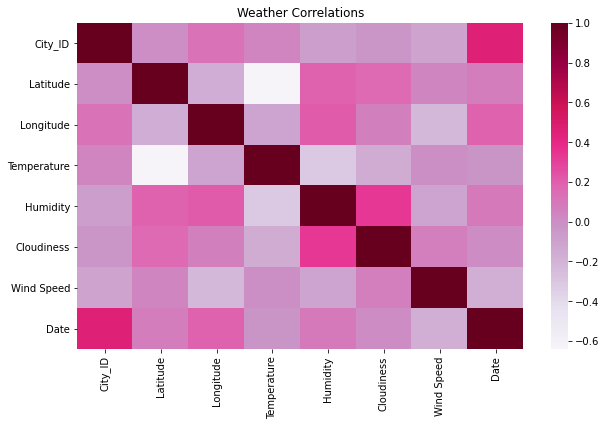

In [15]:
#visualize the data - helpful

plt.figure(figsize=(10,6))

sns.heatmap(corrs, cmap="PuRd")

plt.title("Weather Correlations")
plt.show()

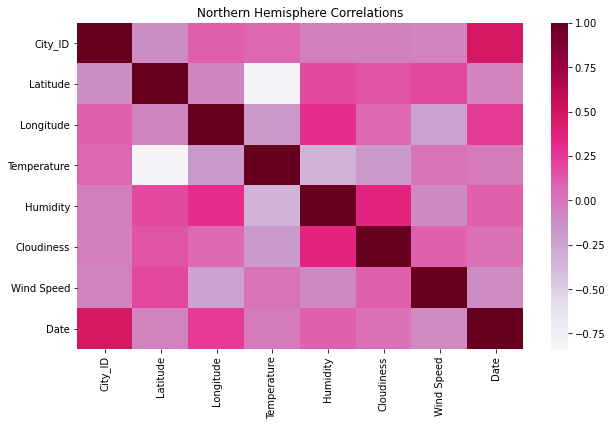

In [16]:
corrs2 = df.loc[df.Hemisphere_NS == "Northern"].corr()

plt.figure(figsize=(10,6))

sns.heatmap(corrs2,cmap="PuRd")

plt.title("Northern Hemisphere Correlations")
plt.show()

In [17]:
target = df.Temperature
feature = df.Latitude

In [18]:
# created stats model - defining x & y

X = sm.add_constant(feature)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     387.2
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           7.17e-66
Time:                        16:12:18   Log-Likelihood:                -2383.8
No. Observations:                 560   AIC:                             4772.
Df Residuals:                     558   BIC:                             4780.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.2371      0.845     79.576      0.000      65.577      68.897
Latitude      -0.4302      0.022    -19.678      0.000      -0.473      -0.387
==============================================================================
Omnibus:                       35.024   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.588
Skew:                          -0.656   Prob(JB):                     1.54e-09
Kurtosis:                       2.874   Cond. No.                         45.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#create line regression

slope = results.params[1]
intercept = results.params[0]

regress_values = feature * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = -0.43x + 67.24'

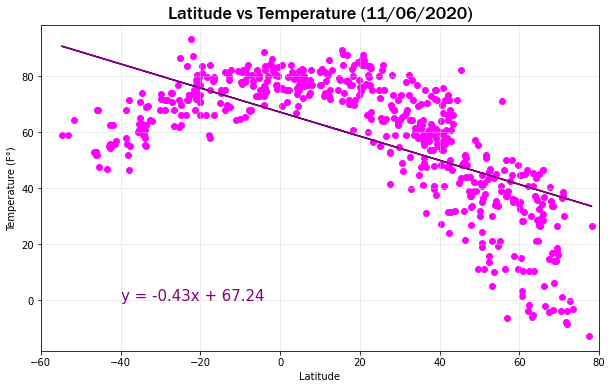

In [20]:
#create overall latitude v. temprature for comparison to N/S hempispheres - demonstrates the linear relationship

plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Temperature, color = "magenta")
plt.title("Latitude vs Temperature (11/06/2020)", fontsize=18, fontweight="bold", fontname = "Franklin Gothic Medium")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F°)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)
plt.plot(feature, regress_values, color="purple")
plt.annotate(line_eq,(-40, 0),fontsize=15,color="purple")

plt.show()

In [21]:
#create line regression models for graphs

def doRegressionWork(hemisphere, df, inp_target):
    #filter to the correct hemispheres
    if hemisphere in ["Northern", "Southern"]:
        df_sub = df.loc[df.Hemisphere_NS == hemisphere]
    else:
        df_sub = df.loc[df.Hemisphere_WE == hemisphere]
        
    target = df_sub[inp_target]
    feature = df_sub.Latitude
    
    X = sm.add_constant(feature)
    Y = target
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())
    
    # grab the equation
    slope = results.params[1]
    intercept = results.params[0]

    regress_values = feature * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
    
    # create visualization
    plt.figure(figsize=(10,6))

    plt.scatter(df_sub.Latitude, df_sub[inp_target], color = "magenta")
    plt.title(f"Latitude vs {inp_target}(11/06/2020)", fontsize=18, fontweight="bold", fontname = "Franklin Gothic Medium")
    plt.xlabel("Latitude")
    plt.ylabel(inp_target)
    plt.grid(color="lightgrey", alpha = 0.5)
    
    plt.plot(feature, regress_values, color="purple")

    plt.show()

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     908.9
Date:                Sat, 07 Nov 2020   Prob (F-statistic):          1.03e-103
Time:                        16:12:18   Log-Likelihood:                -1557.6
No. Observations:                 390   AIC:                             3119.
Df Residuals:                     388   BIC:                             3127.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.0383      1.447     63.599      0.0

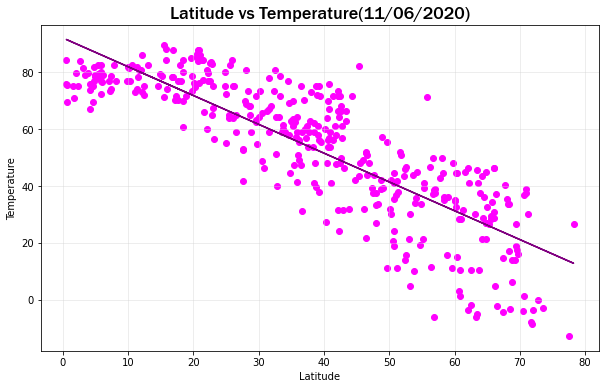

In [22]:
doRegressionWork("Northern", df, "Temperature") 

#demonstrates the negative linear realationship between latitude and temprature.
#the higher the higher the latitude in the Northern Hemisphere, the lower the temprature.

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     207.5
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           3.79e-31
Time:                        16:12:19   Log-Likelihood:                -557.09
No. Observations:                 170   AIC:                             1118.
Df Residuals:                     168   BIC:                             1124.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.1816      0.930     88.349      0.0

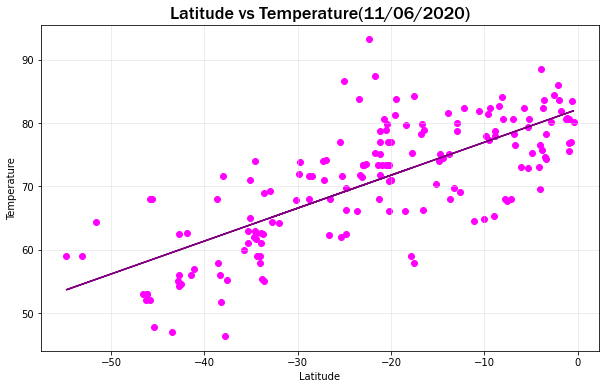

In [23]:
doRegressionWork("Southern", df, "Temperature") 
#demonstrates the negative linear realationship between latitude and temprature.
#the lower the latitude in the Southern Hemisphere, the lower the temprature.
#opposite of the above result

                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     13.37
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           0.000291
Time:                        16:12:19   Log-Likelihood:                -1734.3
No. Observations:                 390   AIC:                             3473.
Df Residuals:                     388   BIC:                             3480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.1139      2.276     29.044      0.0

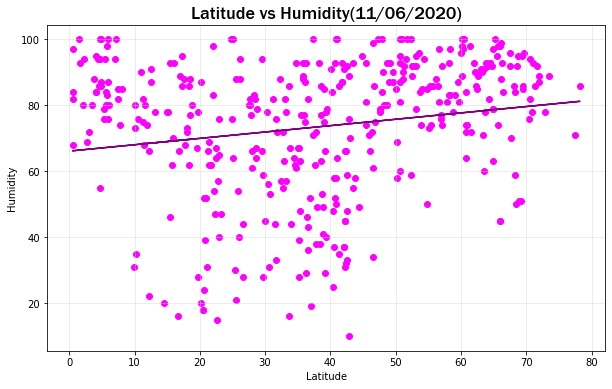

In [24]:
doRegressionWork("Northern", df, "Humidity") 
#demonstrates a slight linear relationship, humidity is most present in higher latitudes of the Northern Hemisphere

                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     7.357
Date:                Sat, 07 Nov 2020   Prob (F-statistic):            0.00738
Time:                        16:12:20   Log-Likelihood:                -734.47
No. Observations:                 170   AIC:                             1473.
Df Residuals:                     168   BIC:                             1479.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.8191      2.641     28.332      0.0

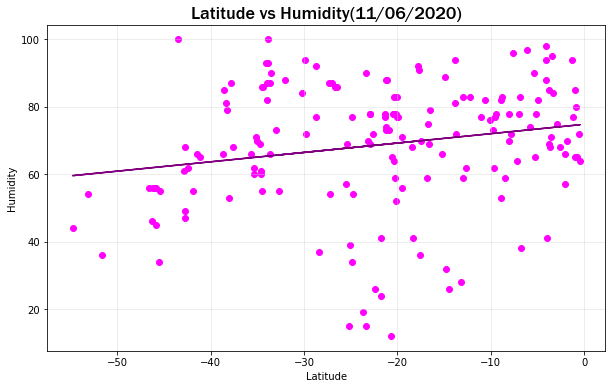

In [25]:
doRegressionWork("Southern", df, "Humidity") 
#Humidity is most present in lower latitudes of the Southern Hemisphere
#like many of the scattre plots, the Northern & Southern hemispsheres are opposing

                            OLS Regression Results                            
Dep. Variable:             Cloudiness   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     8.871
Date:                Sat, 07 Nov 2020   Prob (F-statistic):            0.00308
Time:                        16:12:20   Log-Likelihood:                -1985.4
No. Observations:                 390   AIC:                             3975.
Df Residuals:                     388   BIC:                             3983.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.5010      4.334      8.422      0.0

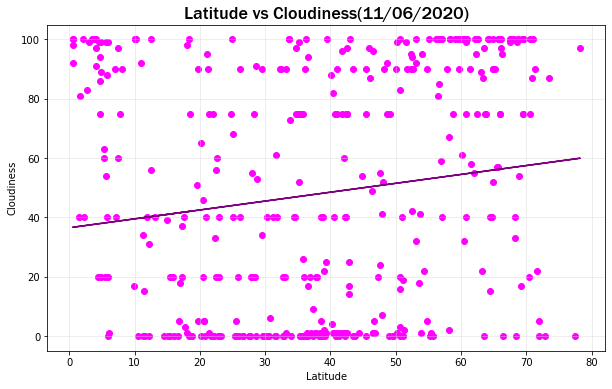

In [26]:
doRegressionWork("Northern", df, "Cloudiness") 
#cloudiness is present across all of the Northern Hemisphere but dereases as you go up in latitude.

                            OLS Regression Results                            
Dep. Variable:             Cloudiness   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           0.000427
Time:                        16:12:21   Log-Likelihood:                -837.98
No. Observations:                 170   AIC:                             1680.
Df Residuals:                     168   BIC:                             1686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.4182      4.855     11.621      0.0

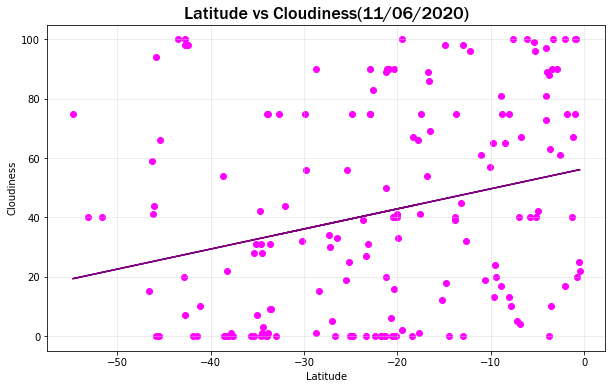

In [27]:
doRegressionWork("Southern", df, "Cloudiness") 
#cloudiness is present across most of the Southern Hemisphere but dereases as you go down in latitude.

                            OLS Regression Results                            
Dep. Variable:             Wind Speed   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     16.69
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           5.36e-05
Time:                        16:12:21   Log-Likelihood:                -1251.4
No. Observations:                 390   AIC:                             2507.
Df Residuals:                     388   BIC:                             2515.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4301      0.660      8.228      0.0

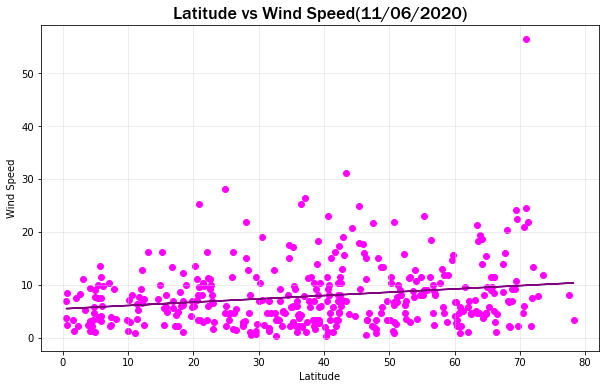

In [28]:
doRegressionWork("Northern", df, "Wind Speed") 
#windspeed is highest closest to the equator

                            OLS Regression Results                            
Dep. Variable:             Wind Speed   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     15.67
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           0.000111
Time:                        16:12:22   Log-Likelihood:                -522.02
No. Observations:                 170   AIC:                             1048.
Df Residuals:                     168   BIC:                             1054.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5812      0.757      7.375      0.0

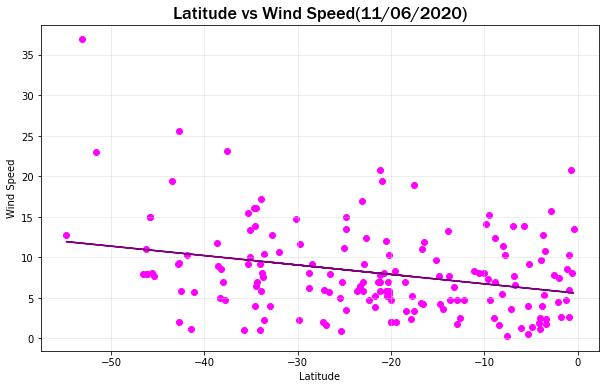

In [29]:
doRegressionWork("Southern", df, "Wind Speed") 
#windspeed is highest closest to the equator